In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

loanData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan.csv', on_bad_lines='warn')

<ipython-input-8-9d13ee2a201e>:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan.csv', on_bad_lines='warn')


In [ ]:
loanData.shape

(39717, 111)

In [ ]:
len(loanData)

39717

# Identify Null Values in the dataset

In [ ]:
loanData.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Drop Null Values from the dataset

In [9]:
loanData.dropna(how='all', inplace=True)
loanData.dropna(axis = 1, how='all', inplace=True)


In [ ]:
loanData.shape

(39717, 57)

In [ ]:
loanData.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [ ]:
len(loanData)

39717

In [ ]:
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Dropping records which have "loan_status" as current.

In [10]:
loanData = loanData.drop(loanData[loanData['loan_status'] == 'Current'].index)

len(loanData)

38577

In [ ]:
loanData.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,N

# Remove unwanted columns which are not relevant for analysis

In [ ]:
loanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8762.000000,20.000000,0.0,0.0,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,16912.000000,29.000000,0.0,0.0,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [11]:
loanData.drop(['url', 'desc', 'pymnt_plan', 'zip_code','earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'tax_liens', 'pub_rec_bankruptcies', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'initial_list_status', 'pub_rec', 'delinq_2yrs', 'pymnt_plan', 'collection_recovery_fee', 'recoveries','total_rec_late_fee', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_prncp', 'total_pymnt_inv', 'total_pymnt', 'title', 'emp_title'], axis=1, inplace=True)

In [ ]:
loanData.shape

(38577, 25)

In [ ]:
loanData.isna().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
open_acc                  0
revol_bal                 0
revol_util               50
total_acc                 0
application_type          0
dtype: int64

In [ ]:
loanData['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [ ]:
loanData[loanData['emp_length'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,application_type
168,1067644,1302032,2500,2500,2500.00000,36 months,7.51%,77.78,A,A3,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,CA,16.30,2,13,4853,42.20%,20,INDIVIDUAL
323,1058717,1290516,18000,18000,18000.00000,60 months,17.58%,452.98,D,D4,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,debt_consolidation,AL,21.96,1,11,5945,83.70%,28,INDIVIDUAL
394,1064582,1298394,4000,4000,4000.00000,36 months,11.71%,132.31,B,B3,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,home_improvement,FL,7.50,0,4,1593,54.90%,6,INDIVIDUAL
422,1064366,1298164,1000,1000,1000.00000,36 months,14.65%,34.50,C,C3,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,major_purchase,NJ,6.00,2,3,2510,83.70%,8,INDIVIDUAL
439,1063912,1296491,8250,8250,8250.00000,36 months,7.51%,256.67,A,A3,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,debt_consolidation,MD,17.87,4,17,7521,10.40%,37,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,610728,10000,10000,9975.00000,36 months,14.22%,342.85,C,C5,NaN,RENT,45000.0,Not Verified,Jan-10,Fully Paid,small_business,PA,4.51,0,9,9696,66.40%,17,INDIVIDUAL
32608,480216,610335,3700,3700,3700.00000,36 months,14.22%,126.86,C,C5,NaN,RENT,17496.8,Not Verified,Jan-10,Fully Paid,other,TX,3.36,0,2,1605,45.90%,5,INDIVIDUAL
32621,479954,609955,10000,10000,9731.17513,36 months,14.22%,342.85,C,C5,NaN,MORTGAGE,36000.0,Not Verified,Jan-10,Charged Off,other,MA,3.83,3,3,344,34.40%,19,INDIVIDUAL
32631,479836,609803,6000,6000,6000.00000,36 months,12.73%,201.40,C,C1,NaN,MORTGAGE,60000.0,Not Verified,Jan-10,Fully Paid,moving,MN,12.80,0,7,7088,63.30%,12,INDIVIDUAL


In [12]:
loanData['emp_length'].fillna(loanData.emp_length.mode()[0], inplace=True)

In [ ]:
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,13648,83.70%,9,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,5,3,1687,9.40%,4,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,2,2956,98.50%,10,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1,10,5598,21%,37,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,3,9,7963,28.30%,12,INDIVIDUAL


In [ ]:
v1 = loanData['emp_length'].apply(lambda x : 0 if '<' in x else x.split('+')[0].strip() if '+' in x else x.split()[0].strip())

print(v1)

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38577, dtype: object


In [13]:
loanData['emp_length'] = loanData['emp_length'].apply(lambda x : 0 if '<' in x else x.split('+')[0].strip() if '+' in x else x.split()[0].strip())

In [14]:
loanData['emp_length'] = loanData['emp_length'].astype(int)



# From the below plot, we see that people who have a tenure of 36 months have defaulted.

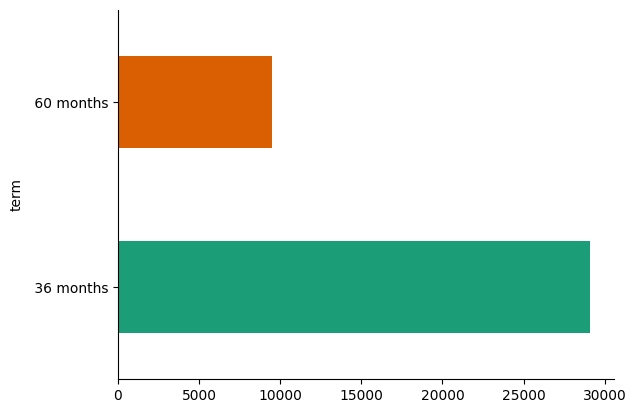

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
loanData.groupby('term').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# From the below plot we understand that people who have employment lenght of more than 10 yrs have defaulted.



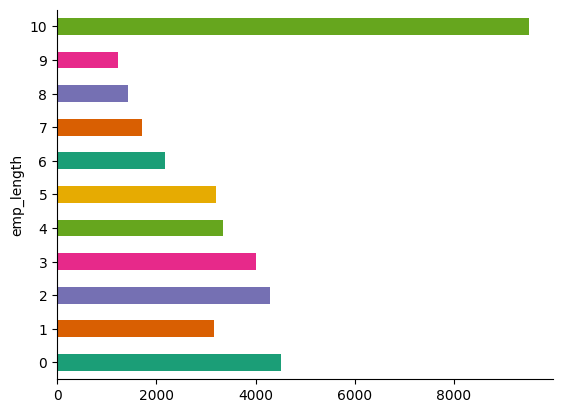

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
loanData.groupby('emp_length').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
loanData[['emp_length','loan_status']]

,emp_length,loan_status
0,10,Fully Paid
1,0,Charged Off
2,10,Fully Paid
3,10,Fully Paid
5,3,Fully Paid
...,...,...
39712,4,Fully Paid
39713,3,Fully Paid
39714,0,Fully Paid
39715,0,Fully Paid


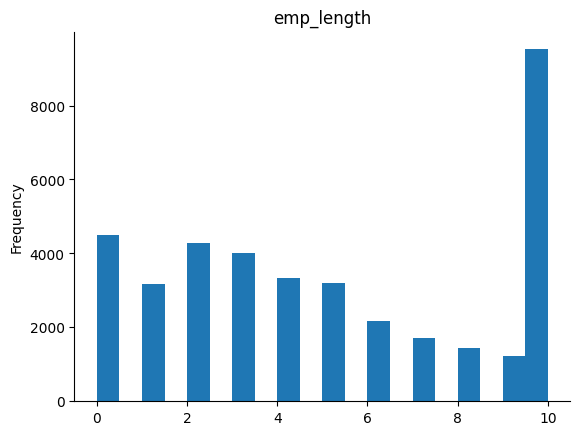

In [ ]:
from matplotlib import pyplot as plt
loanData['emp_length'].plot(kind='hist', bins=20, title='emp_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Find Outliers

In [ ]:
loanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,total_acc
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,5.076445,6.877797e+04,13.272727,0.871737,9.275423,13289.489826,22.052648
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,3.602917,6.421868e+04,6.673044,1.071546,4.401588,15866.492241,11.425861
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,6.000000,3650.000000,13.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,4.000000,5.886800e+04,13.370000,1.000000,9.000000,8762.000000,20.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,9.000000,8.200000e+04,18.560000,1.000000,12.000000,16912.000000,29.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,149588.000000,90.000000


<Axes: >

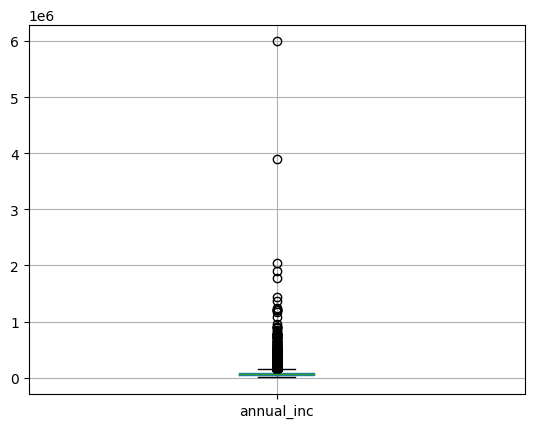

In [ ]:
loanData.boxplot(column=['annual_inc'])

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(loanData['annual_inc']))
print(z)

0        0.697282
1        0.603850
2        0.880222
3        0.304868
5        0.510418
           ...   
39712    0.641909
39713    0.790714
39714    0.486189
39715    2.043389
39716    0.728426
Name: annual_inc, Length: 38577, dtype: float64


In [ ]:
quantileData = loanData['annual_inc'].quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

quantileData

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [ ]:
annual_inc1 = loanData['annual_inc'].quantile(0.95)
loanData = loanData[loanData['annual_inc'] < annual_inc1]

loanData.shape

(36642, 25)

<Axes: >

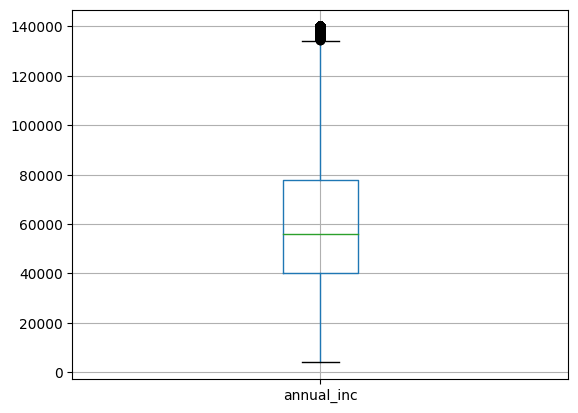

In [ ]:
loanData.boxplot(column='annual_inc')

In [15]:
loanData.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,application_type
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,13648,83.70%,9,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,0,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,5,3,1687,9.40%,4,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,2,2956,98.50%,10,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1,10,5598,21%,37,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,3,9,7963,28.30%,12,INDIVIDUAL
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,1,7,17726,85.60%,11,INDIVIDUAL
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,CA,5.35,2,4,8221,87.50%,4,INDIVIDUAL
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,2,11,5210,32.60%,13,INDIVIDUAL
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,0,RENT,15000.00,Verified,Dec-11,Charged Off,other,TX,18.08,0,2,9279,36.50%,3,INDIVIDUAL
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,5,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,2,14,4032,20.60%,23,INDIVIDUAL


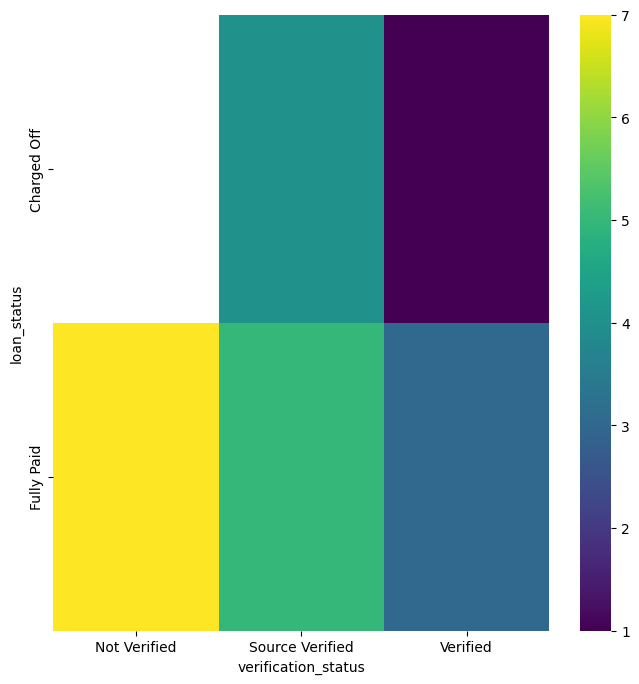

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['loan_status'].value_counts()
    for x_label, grp in _df_47.groupby('verification_status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('verification_status')
_ = plt.ylabel('loan_status')

# As per above it seems that people who were verified have most "Charged-off"

<Axes: xlabel='loan_status', ylabel='count'>

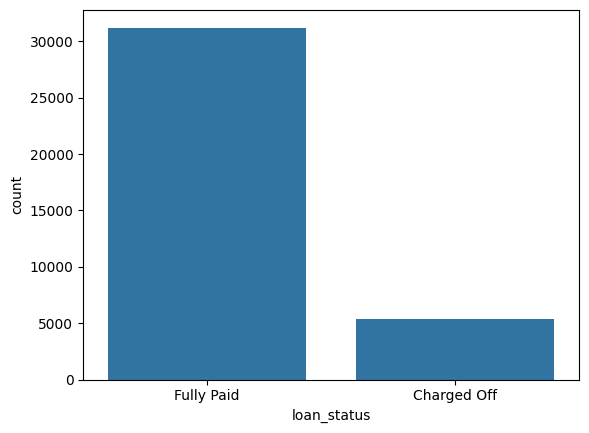

In [ ]:
import seaborn as sns

sns.countplot(x='loan_status', data=loanData)

<Axes: xlabel='int_rate', ylabel='count'>

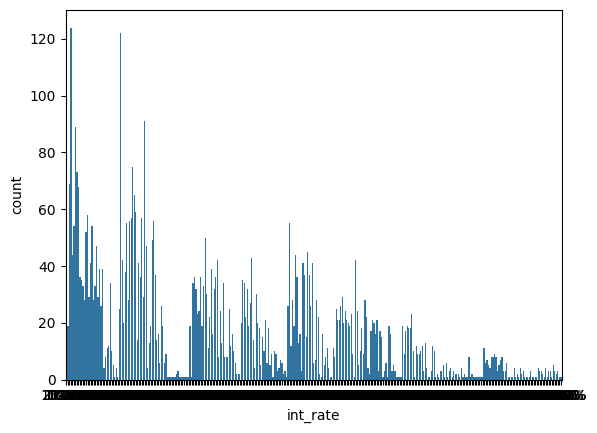

In [ ]:
sns.countplot(x='int_rate', data=loanData[loanData['loan_status'] == 'Charged Off'])

In [ ]:
pd.set_option("display.max_rows", None)
loanData['int_rate'].value_counts()

10.99%    863
7.51%     768
11.49%    755
13.49%    722
7.88%     702
7.49%     614
9.99%     566
5.42%     553
7.90%     542
11.71%    534
11.99%    462
10.37%    439
6.03%     429
12.69%    427
8.49%     413
5.79%     397
10.65%    386
12.42%    385
7.29%     384
12.99%    382
6.62%     376
11.86%    369
8.90%     360
9.63%     359
9.91%     344
10.59%    341
5.99%     334
7.14%     334
6.99%     322
14.27%    319
11.11%    319
12.53%    311
10.74%    302
6.54%     294
6.91%     290
8.94%     282
7.66%     282
13.61%    281
16.77%    279
13.98%    268
13.23%    250
10.00%    244
15.99%    244
11.12%    243
12.68%    242
6.17%     242
10.36%    241
10.75%    238
11.36%    231
13.99%    224
10.62%    213
10.38%    210
16.49%    208
10.25%    208
13.06%    206
11.83%    205
14.96%    202
14.65%    192
6.92%     192
12.18%    192
11.14%    192
15.65%    192
18.25%    191
15.95%    189
15.23%    185
8.00%     185
15.27%    181
16.32%    181
15.58%    179
12.73%    179
9.62%     178
15.21%

In [16]:
loanData['int_rate'] = pd.to_numeric(loanData['int_rate'].apply(lambda x : x.split('%')[0]))

<Axes: xlabel='int_rate_grp', ylabel='count'>

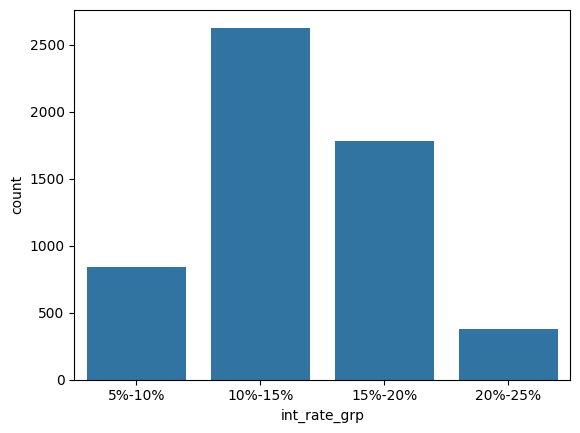

In [17]:
loanData['int_rate_grp'] = pd.cut(loanData['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])

sns.countplot(x='int_rate_grp', data=loanData[loanData['loan_status'] == 'Charged Off'])

<Axes: xlabel='home_ownership', ylabel='count'>

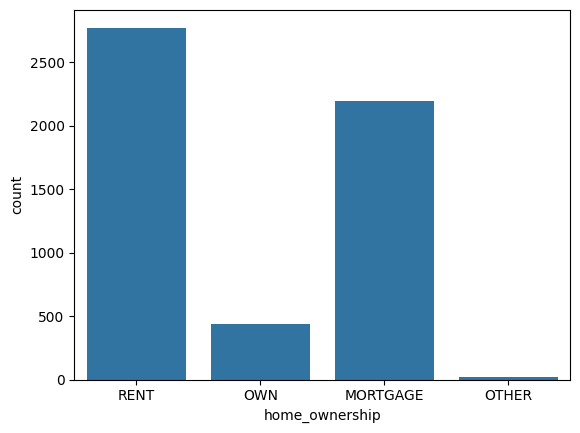

In [ ]:
sns.countplot(x='home_ownership', data=loanData[loanData['loan_status'] == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

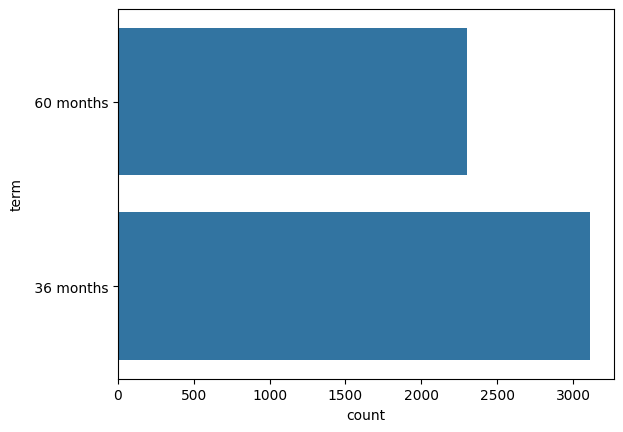

In [ ]:
sns.countplot(y='term', data=loanData[loanData['loan_status']=='Charged Off'])

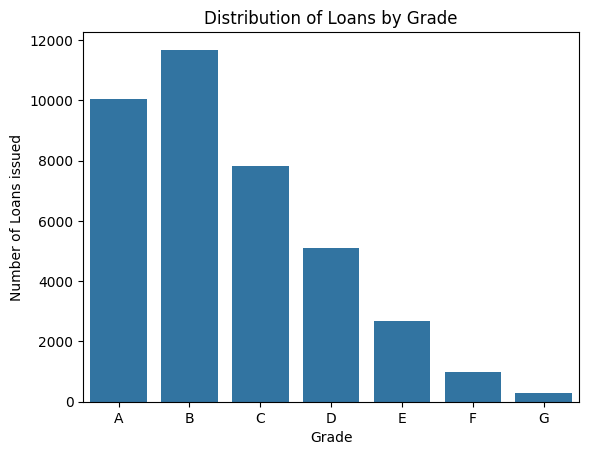

In [18]:
sns.countplot( x="grade", data=loanData,order = np.sort(loanData['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")
plt.show()

Text(0.5, 0, 'Number of Loans issued')

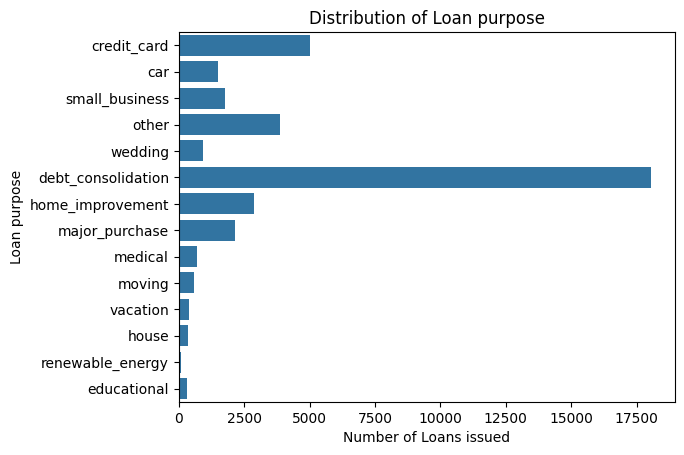

In [19]:
sns.countplot(y='purpose', data=loanData)
plt.title('Distribution of Loan purpose')
plt.ylabel("Loan purpose")
plt.xlabel("Number of Loans issued")